### Урок 7. Многомерный статистический анализ. Линейная регрессия
##### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

X = zp
y = ks

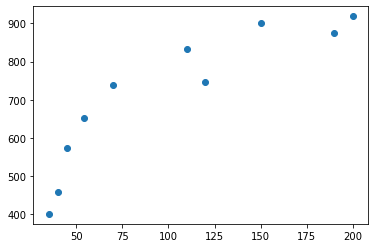

In [87]:
plt.scatter(X, y)
plt.show()

In [88]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [89]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [90]:
y_hat = a + b * X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [91]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

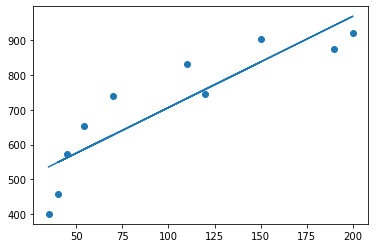

In [92]:
plt.scatter(X, y)
plt.plot(X, y_hat)
plt.show()

In [93]:
X = X.reshape((10, 1))
y = y.reshape((10, 1))
X, y

(array([[ 35],
        [ 45],
        [190],
        [200],
        [ 40],
        [ 70],
        [ 54],
        [150],
        [120],
        [110]]),
 array([[401],
        [574],
        [874],
        [919],
        [459],
        [739],
        [653],
        [902],
        [746],
        [832]]))

In [94]:
Xi = np.hstack([np.ones((10, 1)), X])
Xi

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [95]:
B = np.dot(np.linalg.inv(Xi.T @ Xi), Xi.T @ y) # y = B_0 + B_1*Xi
B # B_0 и B_1

array([[444.17735732],
       [  2.62053888]])

##### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). 

In [96]:
def mse_(B1, y = y, X = X, n = 10):
    return np.sum((B1 * X - y) ** 2) / n

alpha = 1e-7


In [105]:
B1 = 5
n = 10

In [106]:
for i in range(10):
    B1 -= alpha * (2 / n) * np.sum((B1 * X - y) * X)
    print(f' B1 = {B1}')

 B1 = 5.00245174
 B1 = 5.004896724671743
 B1 = 5.00733497262832
 B1 = 5.009766502431538
 B1 = 5.012191332592058
 B1 = 5.014609481569541
 B1 = 5.017020967772782
 B1 = 5.019425809559858
 B1 = 5.021824025238262
 B1 = 5.024215633065042


In [107]:
for i in range(10000):
    B1 -= alpha * (2 / n) * np.sum((B1 * X - y) * X)
    if i % 1000 == 0:
        print(f'Iteration {i}: B1 = {B1} , mse = {mse_(B1)}')

Iteration 0: B1 = 5.026600651246945 , mse = 66782.46944152871
Iteration 1000: B1 = 5.8351377723267035 , mse = 56558.053094428105
Iteration 2000: B1 = 5.88635642164834 , mse = 56517.02372507602
Iteration 3000: B1 = 5.889600985156866 , mse = 56516.859079086236
Iteration 4000: B1 = 5.889806519517884 , mse = 56516.85841838144
Iteration 5000: B1 = 5.8898195395661705 , mse = 56516.8584157301
Iteration 6000: B1 = 5.889820364351175 , mse = 56516.85841571946
Iteration 7000: B1 = 5.88982041659908 , mse = 56516.8584157194
Iteration 8000: B1 = 5.88982041990885 , mse = 56516.85841571941
Iteration 9000: B1 = 5.889820420118505 , mse = 56516.8584157194


In [108]:
mse_(5.889820)

56516.85841572182

##### *3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).